In [1]:
from torchvision import datasets
data_path = '../temp'
c10 = datasets.CIFAR10(data_path, train=True, download=True)
c10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
len(c10)

50000

In [3]:
len(c10_val)

10000

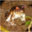

In [5]:
c10[0][0]

In [6]:
c10[0][1]

6

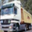

In [7]:
c10[1][0]

In [9]:
c10[1][1]

9

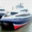

In [10]:
c10_val[1][0]

In [2]:
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [12]:
i = to_tensor(c10_val[1][0])

In [14]:
i.shape

torch.Size([3, 32, 32])

In [19]:
i.reshape(1, 3*32*32)

tensor([[0.9216, 0.9059, 0.9098,  ..., 0.6980, 0.7490, 0.7804]])

In [16]:
i

tensor([[[0.9216, 0.9059, 0.9098,  ..., 0.9137, 0.9137, 0.9098],
         [0.9333, 0.9216, 0.9216,  ..., 0.9255, 0.9255, 0.9216],
         [0.9294, 0.9176, 0.9176,  ..., 0.9216, 0.9216, 0.9176],
         ...,
         [0.3412, 0.1686, 0.0745,  ..., 0.6627, 0.7137, 0.7373],
         [0.3216, 0.1804, 0.1412,  ..., 0.6824, 0.7255, 0.7333],
         [0.3333, 0.2431, 0.2275,  ..., 0.6588, 0.7059, 0.7294]],

        [[0.9216, 0.9059, 0.9098,  ..., 0.9137, 0.9137, 0.9098],
         [0.9333, 0.9216, 0.9216,  ..., 0.9255, 0.9255, 0.9216],
         [0.9294, 0.9176, 0.9176,  ..., 0.9216, 0.9216, 0.9176],
         ...,
         [0.3882, 0.2000, 0.0902,  ..., 0.7216, 0.7725, 0.7922],
         [0.3765, 0.2235, 0.1725,  ..., 0.7412, 0.7843, 0.7922],
         [0.3961, 0.2941, 0.2627,  ..., 0.7176, 0.7647, 0.7843]],

        [[0.9216, 0.9059, 0.9098,  ..., 0.9137, 0.9137, 0.9098],
         [0.9333, 0.9216, 0.9216,  ..., 0.9255, 0.9255, 0.9216],
         [0.9294, 0.9176, 0.9176,  ..., 0.9216, 0.9216, 0.

In [17]:
3*32*32

3072

In [3]:
label_map = {0: 0, 2: 1}
c2 = [(to_tensor(img), label_map[label])
                 for img, label in c10
                 if label in [0, 2]]
c2_val = [(to_tensor(img), label_map[label])
                 for img, label in c10_val
                 if label in [0, 2]]

In [21]:
len(c2)

10000

In [23]:
len(c2_val)

2000

In [24]:
c2[0][0]

tensor([[[0.6431, 0.4118, 0.4627,  ..., 0.4275, 0.4235, 0.3569],
         [0.6549, 0.4549, 0.2824,  ..., 0.4118, 0.4118, 0.3490],
         [0.5490, 0.5569, 0.4667,  ..., 0.4078, 0.3294, 0.3059],
         ...,
         [0.5451, 0.5569, 0.5294,  ..., 0.3490, 0.3804, 0.4941],
         [0.6392, 0.6000, 0.5725,  ..., 0.3333, 0.3843, 0.4980],
         [0.7176, 0.6902, 0.6039,  ..., 0.3686, 0.3569, 0.4784]],

        [[0.8078, 0.5490, 0.5804,  ..., 0.5765, 0.5765, 0.5059],
         [0.8353, 0.6275, 0.4275,  ..., 0.5569, 0.5569, 0.4980],
         [0.7490, 0.7569, 0.6392,  ..., 0.5451, 0.4706, 0.4510],
         ...,
         [0.5804, 0.6078, 0.6118,  ..., 0.5255, 0.5804, 0.6902],
         [0.6157, 0.6431, 0.6431,  ..., 0.5098, 0.5804, 0.6980],
         [0.6000, 0.7137, 0.6039,  ..., 0.5255, 0.5216, 0.6667]],

        [[0.3294, 0.2392, 0.3961,  ..., 0.2863, 0.2706, 0.2235],
         [0.3294, 0.1922, 0.1686,  ..., 0.3098, 0.2824, 0.2235],
         [0.2549, 0.2588, 0.3098,  ..., 0.3294, 0.2275, 0.

In [5]:
import torch.nn as nn
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

In [28]:
import torch
loss = nn.MSELoss()
trainer = torch.optim.SGD(model.parameters(), lr=0.05)

for epoch in range(100):
    
    l = None
    for img, label in c2:
        x = img.reshape(1, -1)
        pt = model(x)
        if label == 1:
            yt = torch.tensor([[1.0,0.0]])
        else:
            yt = torch.tensor([[0.0,1.0]])
        if not l:
            l = loss(pt, yt)
        else:
            l += loss(pt, yt)
    l = l/len(c2)
    
    trainer.zero_grad()
    l.backward()
    trainer.step()
    print(f'epoch {epoch+1}, loss {l:f}')

epoch 1, loss 0.217742
epoch 2, loss 0.196579
epoch 3, loss 0.195607
epoch 4, loss 0.194706
epoch 5, loss 0.193835
epoch 6, loss 0.192995
epoch 7, loss 0.192185
epoch 8, loss 0.191403
epoch 9, loss 0.190648
epoch 10, loss 0.189920
epoch 11, loss 0.189216
epoch 12, loss 0.188538
epoch 13, loss 0.187883
epoch 14, loss 0.187250
epoch 15, loss 0.186639
epoch 16, loss 0.186048
epoch 17, loss 0.185478
epoch 18, loss 0.184926
epoch 19, loss 0.184393
epoch 20, loss 0.183877
epoch 21, loss 0.183377
epoch 22, loss 0.182893


KeyboardInterrupt: 

In [10]:
i = torch.stack([img[0].view(-1).unsqueeze(0) for img in c2]).squeeze(1)

In [11]:
i.shape

torch.Size([10000, 3072])

In [31]:
i

tensor([[0.6431, 0.4118, 0.4627,  ..., 0.1137, 0.1020, 0.1725],
        [0.0667, 0.0667, 0.0667,  ..., 0.0784, 0.0706, 0.0627],
        [0.7725, 0.7765, 0.7882,  ..., 0.2392, 0.2471, 0.2235],
        ...,
        [0.6078, 0.6039, 0.6039,  ..., 0.2784, 0.2824, 0.2824],
        [0.6118, 0.6078, 0.6118,  ..., 0.6392, 0.6353, 0.6353],
        [0.5686, 0.5922, 0.6118,  ..., 0.2196, 0.2078, 0.2118]])

In [7]:
import torch
yt = []
for img in c2:
    label = img[1]
    if label == 1:
        yt.append(torch.tensor([[1.0,0.0]]))
    else:
        yt.append(torch.tensor([[0.0,1.0]]))

In [8]:
y = torch.stack(yt).squeeze(1)

In [9]:
y.shape

torch.Size([10000, 2])

In [45]:
import torch
trainer = torch.optim.SGD(model.parameters(), lr=0.02)

for epoch in range(200):
    pred = model(i)
    
    l = loss(pred, y)
    
    trainer.zero_grad()
    l.backward()
    trainer.step()
        
    print(f'epoch {epoch+1}, loss {l:f}')

epoch 1, loss 0.150537
epoch 2, loss 0.146003
epoch 3, loss 0.145920
epoch 4, loss 0.145909
epoch 5, loss 0.145900
epoch 6, loss 0.145891
epoch 7, loss 0.145882
epoch 8, loss 0.145873
epoch 9, loss 0.145864
epoch 10, loss 0.145855
epoch 11, loss 0.145846
epoch 12, loss 0.145837
epoch 13, loss 0.145828
epoch 14, loss 0.145819
epoch 15, loss 0.145810
epoch 16, loss 0.145802
epoch 17, loss 0.145793
epoch 18, loss 0.145784
epoch 19, loss 0.145775
epoch 20, loss 0.145767
epoch 21, loss 0.145758
epoch 22, loss 0.145750
epoch 23, loss 0.145741
epoch 24, loss 0.145732
epoch 25, loss 0.145724
epoch 26, loss 0.145715
epoch 27, loss 0.145707
epoch 28, loss 0.145698
epoch 29, loss 0.145690
epoch 30, loss 0.145681
epoch 31, loss 0.145673
epoch 32, loss 0.145665
epoch 33, loss 0.145656
epoch 34, loss 0.145648
epoch 35, loss 0.145640
epoch 36, loss 0.145631
epoch 37, loss 0.145623
epoch 38, loss 0.145615
epoch 39, loss 0.145606
epoch 40, loss 0.145598
epoch 41, loss 0.145590
epoch 42, loss 0.145582
e

In [41]:
(0.2**2 + 0.2**2)**0.5

0.28284271247461906

In [42]:
(0.1**2 + 0.1**2)**0.5

0.14142135623730953

In [48]:
c = 0
for img, label in c2_val:
    x = img.view(-1).unsqueeze(0)
    pt = model(x)
    if float(pt[0][0]) < 0.5:
        lp = 0
    else:
        lp = 1
    if lp == label:
        c += 1
    
print(c)

1610


In [12]:
r = model(i)

In [13]:
r.shape

torch.Size([10000, 2])

In [26]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        #self.linear = nn.Linear(in_features=10, out_features=10)
        self.layer_norm = nn.LayerNorm(normalized_shape=10)

    def forward(self, x):
        #x = self.linear(x)
        x = self.layer_norm(x)
        return x

In [29]:
model = SimpleModel()

input_tensor = torch.randn(5, 10)  # 假设我们有5个数据点，每个数据点有10个特征
output = model(input_tensor)
print(output)

tensor([[ 0.6703, -0.3193, -0.0504,  0.2626,  0.8505,  2.1648, -1.1313, -1.4012,
         -0.2253, -0.8207],
        [ 0.8663, -1.2740,  0.1642,  0.5552, -0.3822,  0.7486,  1.4783,  0.6519,
         -1.5288, -1.2796],
        [-1.0955,  1.2393, -1.2656, -1.0606,  1.5099,  1.1877, -0.2051,  0.6122,
         -0.4143, -0.5080],
        [-0.8586, -0.6972,  0.1239,  1.4263,  0.1926,  1.9264,  0.3542, -1.2003,
         -0.0816, -1.1857],
        [-0.6136, -1.9212,  1.4527, -0.5709,  0.1045, -0.2746,  1.3914,  0.6075,
          0.6501, -0.8259]], grad_fn=<NativeLayerNormBackward0>)


In [23]:
i = input_tensor * 100

In [18]:
output.shape

torch.Size([5, 10])

In [22]:
sum(output[1])

tensor(-2.0862e-07, grad_fn=<AddBackward0>)

In [21]:
sum([-0.0869, -0.3039, -1.0406,  1.4045,  1.1895, -1.6649, -1.1173,  0.3480,
         1.1256,  0.1460])

8.326672684688674e-17

In [31]:
i

tensor([[   4.1266,   68.2184,   -2.2712,  117.9320, -110.2279,  -26.2450,
           73.6216,   47.3495,   -7.0596,  -50.9829],
        [  70.3783,  -57.8708,  -12.8249,   59.2700,  -27.0886,   81.6364,
         -147.0735,   -1.7449,  -62.4894,  111.2654],
        [  68.4841,  -69.6549,   48.5636,  104.1738,   46.2004,  -39.4238,
           16.6962,  -89.8262,  171.0666, -148.5575],
        [  83.2942,  203.1914,  140.9372,  -77.1576,   30.8899,   80.8478,
          101.0586,  -95.3450,   32.6517,  117.7600],
        [ -87.8463, -177.8218,   79.8370,   13.8696,  121.7113,   49.0142,
          -17.7826, -109.1550,  -25.8691,  118.0983]])

In [32]:
model(i)

tensor([[-0.1151,  0.8929, -0.2158,  1.6748, -1.9137, -0.5928,  0.9779,  0.5647,
         -0.2911, -0.9819],
        [ 0.9121, -0.7824, -0.1872,  0.7654, -0.3757,  1.0609, -1.9611, -0.0408,
         -0.8435,  1.4524],
        [ 0.6261, -0.8726,  0.4100,  1.0133,  0.3844, -0.5446,  0.0643, -1.0914,
          1.7390, -1.7286],
        [ 0.2439,  1.6053,  0.8984, -1.5780, -0.3511,  0.2161,  0.4456, -1.7845,
         -0.3311,  0.6353],
        [-0.8889, -1.8382,  0.8802,  0.1843,  1.3220,  0.5550, -0.1497, -1.1137,
         -0.2350,  1.2839]], grad_fn=<NativeLayerNormBackward0>)

In [34]:
for n, p in model.named_parameters():
    print(n)
    print(p)

layer_norm.weight
Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True)
layer_norm.bias
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


In [35]:
total_params = sum(p.numel() for p in model.parameters())
print(f'Total number of parameters: {total_params}')

# 可训练参数个数
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of trainable parameters: {trainable_params}')

# 不可训练参数个数
non_trainable_params = sum(p.numel() for p in model.parameters() if not p.requires_grad)
print(f'Total number of non-trainable parameters: {non_trainable_params}')

Total number of parameters: 20
Total number of trainable parameters: 20
Total number of non-trainable parameters: 0
